# Homework 1

## Jed Bell

In this course we will be using Python for writing code to apply machine learning and text analysis methods to economics topics. Python is free, flexible, offers a variety of predefined packages, and is popular. It can handle everything from the statistical analysis of Stata to the matrix algebra and simulation of Matlab.

This assignment is meant to introduce you to how we will be using Python in this course. For this assignment, you should write/type your answers into this worksheet. You may discuss the problem set with your class mates, but every student must do their own work. 

It is always important to cite our references that help us in our work. Please list the students you work with here:

1\. 

2\.

3\.

### I. PRELIMINARIES (20 points total)

Preliminaries are listed in the HW1 Repository README.md. It includes the following:

* Downloading and installing Python/Anaconda

* Installing necessary pacakges for the homework assignment

* Setting up your GitHub account and connecting it to GitHub Classroom for Econ 1680

* How to sumbit your homework assignment and code (including how to turn your .ipynb file into a .pdf to submit on Canvas)

### II.	NUMERICAL DATA (40 points total)

1\. Access Zillow Real Estate Data using the Nasdaq Data Link API. Nasdaq Data Link is a dataset aggregation website that also has other economics datasets. These types of websites can make it easier to get data and to explore what types of datasets are available. 
    
a. Set up free account with Nasdaq Data Link (https://data.nasdaq.com/). Find your API Key in your Account Settings. You will need this to download the data.

b. Find the “Zillow Real Estate Data” that is Free (https://data.nasdaq.com/databases/ZILLOW/data) This will be the data you will download.

c. Click on the “Usage” tab, then select the “Python” sub-tab for instructions on using the Nasdaq Data Link API.

d. To decide which variables and regions we want to download data for, we will first download information on the indicators and regions. In a python environment, you will run the code above to import packages, setup your API connection, and download the indicator and region dataframes:

In [19]:
import nasdaqdatalink
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Change the API key to yours
nasdaqdatalink.ApiConfig.api_key = 'JkuLYjMwdPgxTvVKsxy8'
df_zillow_indicators = nasdaqdatalink.get_table('ZILLOW/INDICATORS', paginate=True)
df_zillow_regions = nasdaqdatalink.get_table('ZILLOW/REGIONS', paginate=True)

i. What does ZVHI in the indicator descriptions stand for? (1 point) 

ii. What is the indicator, description, and category of row 38 in df_zillow_indicators? Hint: use `.iloc[]` (2 points) 

iii. In df_zillow_regions, how many regions are there when you search for “Providence; RI”? What is the region_id number for Providence, RI? Hint: use `.str.contains(‘Providence; RI’)` (4 points)

iv. Download a dataframe the city of Providence, RI on ZHVI Single-Family Home values with the correct indicator and region IDs entered using the following line:

```python
df_zillow_sfh = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id=' ' , region_id=' ',paginate=True)
```

In [13]:
# Write the code you need (if any) to answer the questions above:
df_zillow_indicators
df_zillow_indicators.iloc[39]
df_zillow_regions[df_zillow_regions['region'].str.contains('Providence; RI')]
df_zillow_sfh = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZSFH' , region_id='26637',paginate=True)

Answers:

i. ZVHI is the Zillow Home Value Index

ii. Row 38 (which has index 39) is the LRAM indicator, which is the Median List Price (Raw, All Homes, Monthly), which is in the Inventory and Sales category

iii. There are 4 regions. Providence, East Providence, North Providence and Lower South Providence. The region_id for Providence is 26637.

iv. Indicator = 'ZSFH', region_id = '26637'

2\. Descriptive statistics 

a. What is the data frequency in df_zillow_sfh? (1 points)
    
b. What is the median dollar value of a home in df_zillow_sfh? (4 points)
    
c.	What is the median dollar value of a home in df_zillow_sfh for the year of 2020? Hint: use  `[df_zillow_sfh['date'].dt.year==2020]` (4 points)

In [18]:
# Write the code you need (if any) to answer the questions above:
df_zillow_sfh
df_zillow_sfh['value'].median()
df_zillow_sfh[df_zillow_sfh['date'].dt.year==2020]['value'].median()

251775.5

Answer:

a. Monthly

b. 174050.0

c. 251775.5

3\. Visualize the Data

a. Plot a time series graph for values df_zillow_sfh. Be sure to title your graph and label your axes. (7 points)

b. Plot time series graph for yearly median values df_zillow_sfh. Be sure to title your graph and label your axes. Hint: you will can create a new dataframe by creating a ‘year’ column using .dt.year and then use `.groupby(by=[‘year’]).median()` to make a yearly dataframe. (10 points)

c. What looks different in these graphs? Why? (3 points)
    
d. Describe the patterns in the graph. What does it say about the housing market in Providence, RI over time? In recent years? What additional data would you need to make claims about what is changing this price? (4 points)

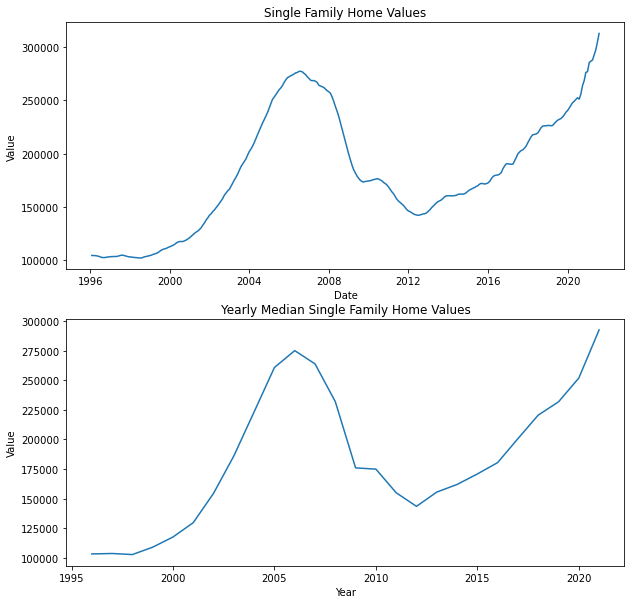

In [30]:
# Write the code you need (if any) to answer the questions above:
fig, ax = plt.subplots(2, 1, figsize = (10,10))
sns.lineplot(x='date', y='value', data=df_zillow_sfh, ax=ax[0]).set(title='Single Family Home Values', 
                                                          xlabel='Date', ylabel='Value')

df_zillow_sfh['year'] = df_zillow_sfh['date'].dt.year
med_zillow_sfh = df_zillow_sfh.groupby('year').median()

sns.lineplot(x='year', y='value', data=med_zillow_sfh, ax=ax[1]).set(
    title='Yearly Median Single Family Home Values', xlabel='Year', ylabel='Value')
plt.show()

Answer:

a. See top graph

b. See bottom graph

c. The graph of the median prices is not as smooth and has more abrupt changes. This is because the frequency of the
   observations is less often then the other graph. These observations are spaced out by a full year, where as the 
   other one is monthly.

d. The values of single family homes in Providence, RI peaked around 2006 and then plummeted until 2012. Since 2012
   however, values have been steadily rising and now, in 2022, have eclipsed their previous peak from 2006. In order to
   make claims about what is changing the price, I would likely need data on home values in other markets that are both
   similar and different to Providence. Other useful data could be median household income, unemployment, or inflation.

### II.	TEXT DATA (40 points total)
    
4\. Download US Economic News Dataset from Kaggle.com: Sign up for a free account with Kaggle.com. This website hosts data science competitions and often has cool datasets available for download. We will be using the US Economic News Dataset at https://www.kaggle.com/heeraldedhia/us-economic-news-articles. Download the CSV file from the website by clicking “Download.”
     
5\. Load a subset of the data into Jupyter/Spyder/Python: Sometimes you may be working with a large dataset and it is therefore important to understand how to load a subset of the data at a time. The US Economic News dataset has 8,000 observations.

a. Run the code below and explain in words each of the lines of code with comments (use # to comment): (5 points)
      
b. What code would you write to keep only the ‘date’, ‘headline’, and ‘text’ columns in the dataframe? Run that code. (2 points)

In [42]:
import os
import csv

# This finds the file in the directory so the code can access it from this folder. However, I saved mine in the 
# same folder as this notebook so I left it empty.
folder_path = ""

# This combines the path with the filename to open the file in this notebook. The second line opens a csv reader
# object that reads through the file line by line. 
fileReader = open(os.path.join(folder_path, "US-Economic-News.csv"), "r", encoding="unicode_escape")
csvReader = csv.reader(fileReader)

# This creates file and csv writer objects, which can store new data from the file and csv reader objects.
fileWriter = open(os.path.join(folder_path, "Subset_US_Economic_News.csv"), "w", encoding="unicode_escape", 
                  newline='')
csvWriter = csv.writer(fileWriter)

# This defines the header and tells the csv writer object to write the header into the new csv file.
acHeader = next(csvReader)
csvWriter.writerow(acHeader)

# This loops through the first 800 rows of the original data set and writes them into the new subset file.
for index, acRow in enumerate(csvReader):
    if index < 800:
        csvWriter.writerow(acRow)

# This closes the file reader and file writer, effectively saving the earlier work.
fileReader.close()
fileWriter.close()

# This creates a dataframe out of the new, smaller file with only the subset of the data and converts the date to
# a datetime object.
df_news = pd.read_csv(os.path.join(folder_path,"Subset_US_Economic_News.csv"), encoding='unicode_escape')
df_news['date'] = pd.to_datetime(df_news['date'])

In [43]:
# Write the code you need (if any) for b.:
df_news_trimmed = df_news[['date', 'headline', 'text']]

6\. This dataframe is full of text data about US Economic News. When we try to extract information from text, formatting of words and string in code is very important.

a. Count the number of headlines that have ‘US’ in them. Hint: loop over `df_news[‘headlines’]`. (3 points)
    
b. Count the number of headlines that have ‘us’ in them. (3 points)
    
c. Why are these counts different? Hint: tell python to check if ‘us’ is in the string ‘trust’. Then tell python to check if ‘ us ‘ is in the string ‘trust’. (3 points)

In [53]:
# Write the code you need (if any) to answer the questions above:
US_headlines = 0

for index, item in df_news.iterrows():
    if "US" in item['headline']:
        us_headlines += 1
    
print('US Headline Count:', US_headlines)

us_headlines = 0

for index, item in df_news.iterrows():
    if "us" in item['headline']:
        us_headlines += 1
    
print('us Headline Count:', us_headlines)

print('us' in 'trust')
print('us ' in 'trust')
print('US' in 'trust')

US Headline Count: 0
us Headline Count: 143
True
False
False


Answer:

a. 0

b. 143

c. This is because checking for strings is case and punctuation sensitive. Looking for just lower case "us" will
   return true for every word that contains an "us" in it while looking for upper case "US" will look only for
   instances of the the upper case use of the two letters together. In order to look for the abbreviation for the 
   United States, we would need to look for "U.S."

7\. In text analysis, we will need to perform a few tasks to clean the data to prepare it for consistent analysis. Run the code and explain what each line does as comments (use # to comment): (5 points)

In [56]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# This creates a unique list of stop words in the english language (common words like "the", "a", "and", etc.)
stops = set(stopwords.words('english'))

# This maps all the characters in the third argument to None
table_punctuation = str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~') 

# This looks through the rows in the dataframe and cleans the text by first getting rid of punctuation, then by
# by turning each string of text into a list of words that excludes stop words.
token_list = []
for i, row in enumerate(df_news['text']):
    text = row.translate(table_punctuation)
    tokens = [word.lower() for word in nltk.tokenize.word_tokenize(text) if word.lower() not in stops]
    token_list.append(tokens)

# This creates a new column from the lists of words created in the previous step.
df_news['tokens'] = token_list

# This creates a list of words that are usually very relevant to monetary policy.
monetary_policy_wordlist = ['monetary', 'fed ', 'federal reserve', 'Federal Reserve', 'Monetary']

# This counts the number of times the words in the monetary_policy_wordlist appear in the dataframe, and it creates
# a column for a binary variable that is equal to one if the text contains any words from the 
# monetary_policy_wordlist, and zero if it does not.
tally = 0
monetary_text = []
for row in df_news['text']:
    mon = 0
    if any(keyword in row for keyword in monetary_policy_wordlist):
        tally += 1
        mon = 1
    monetary_text.append(mon)
print(tally)
df_news['monetary_flag'] = monetary_text

# This creates 2 dataframes, one that contains only rows that has at least one word from the 
# monetary_policy_wordlist, and one that contains only rows that do not.
df_monetarynews = df_news[df_news['monetary_flag']==1]
df_nonmonetarynews = df_news[df_news['monetary_flag']!=1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jedbe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


236


8\. Compare and contrast the news articles about monetary policy in the US and those about non-monetary-policy economics in the US.

a. This code calculates the top 30 most common words in df_news. 
```python
from collections import Counter
top_N = 30
words = [word for tokenlist in df_news['tokens'].tolist() for word in tokenlist]
topwords = pd.DataFrame(Counter(words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(topwords)
```  
Adapt it for the following subquestions:

i. What are the 15 most common words from df_monetarynews? (3 points)

ii. What are the 15 most common words from df_nonmonetarynews? (3 points)      

iii. What differences do you notice? (1 points) 


In [62]:
# Write the code you need (if any) to answer the questions above:
from collections import Counter
top_N = 15
mon_words = [word for tokenlist in df_monetarynews['tokens'].tolist() for word in tokenlist]
top_mon_words = pd.DataFrame(Counter(mon_words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(top_mon_words)

non_words = [word for tokenlist in df_nonmonetarynews['tokens'].tolist() for word in tokenlist]
top_non_words = pd.DataFrame(Counter(non_words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(top_non_words)


           Count
Word            
federal      284
fed          270
said         254
rates        252
us           245
reserve      226
interest     217
economy      184
rate         179
new          177
market       162
inflation    156
prices       150
bank         145
economic     139
           Count
Word            
said         516
us           504
new          433
market       433
year         403
stock        366
billion      318
economic     280
investors    269
would        249
million      247
prices       247
last         228
rates        209
one          204


Answer:

i. See the top list

ii. See the bottom list

iii. The monetary list contains the words "federal" and "fed" most often, and a lot more often than the nonmonetary 
     list. The economic words that come up most often in the nonmonetary list are words that seem to mostly be 
     associated with the stock market with words like "stock", "investors", "prices", and "market". The monetary list 
     also contains some of these words, but it overall seems to talk about other aspects of the economy too like the 
     fed, inflation, and interest rates.

b. Building on the code from part a, you will visualize the word use in the different types of articles using a word cloud. Below is the code for making the word cloud for the df_news dataframe. You must adapt it to the other dataframes: 
```python
from wordcloud import WordCloud
allwords = ' '.join(words)
word_cloud = WordCloud(collocations=False, background_color='white').generate(allwords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for US Economics Articles')
plt.show()
``` 
    
i. What is the word cloud for df_monetarynews? (3 points)

ii. What is the word cloud df_nonmonetarynews? (3 points)      

iii. What differences do you notice? Do these differences seem consistent with your list of top 15 most common words? (1 points)

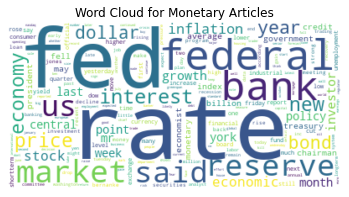

In [71]:
# Write the code you need (if any) to answer the questions above:
from wordcloud import WordCloud
all_mon_words = ' '.join(mon_words)
word_cloud = WordCloud(collocations=False, background_color='white').generate(all_mon_words)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Monetary Articles')
plt.show()

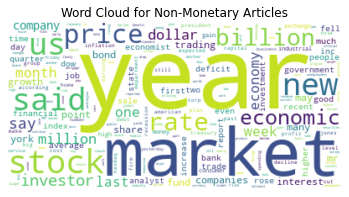

In [70]:
all_non_words = ' '.join(non_words)
word_cloud = WordCloud(collocations=False, background_color='white').generate(all_non_words)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Non-Monetary Articles')
plt.show()

Answer:

i. See top wordcloud

ii. See bottom wordcloud

iii. The top words for the monetary wordcloud are "rate", "fed", "federal", "market" and "bank". The top words for the 
     nonmonetary wordlcoud are "year", "market", "said", and "stock." This is somewhat consistent with the lists from 
     above although it seems that "federal" should be the biggest word for the monetary wordcloud instead of "rate". In
     the nonmonetary list, "said", "us" and "new" appear more oftent han "year" and "market", but the latter two seem
     like more important words so I think they should be the biggest in the bottom wordcloud.

9\. Monetary Uncertainty in the News: Loughran and McDonald (2011) have created a commonly used bank of word-sentiment lists. One list is a list of “uncertainty words” You can find this dataset in the Github HW1 Repository. The following is code to make a Monetary Uncertain Score from df_monetarynews and to plot the figure over time. However, there are three things wrong with in the code. Identify the typos, run the correct code, and insert the graph below. HINT: Run the code line by line and manually view the objects that were created and/or the error codes that appear. (5 points)

<ipython-input-86-52dc18e302c1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetarynews['text_uncertainty_score'] = uncertainty_score
<ipython-input-86-52dc18e302c1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetarynews['year'] = df_monetarynews['date'].dt.year


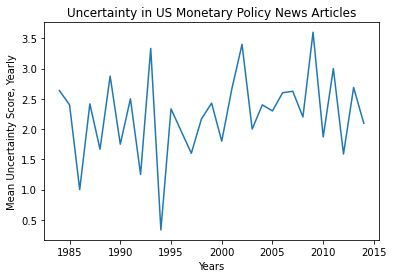

In [86]:
folder_path = ''

# Word Lists
uncertainty_wordlist_LM = pd.read_csv(os.path.join(folder_path,"LM_Uncertainty.csv"), encoding='utf-8')
uncertainty_wordlist_LM = uncertainty_wordlist_LM['uncertain words'].tolist()

# Text Uncertainty Score for Each Article
uncertainty_score = []
for row in df_monetarynews['tokens']:
    u_tally = 0
    for word in uncertainty_wordlist_LM:
        if word in row:
            u_tally += 1
    uncertainty_score.append(u_tally)
                
df_monetarynews['text_uncertainty_score'] = uncertainty_score     
    
# Plot Yearly Mean Monetary Policy Uncertainty Over Time

#Take mean over years
df_monetarynews['year'] = df_monetarynews['date'].dt.year
df_monetarynews_yearly = df_monetarynews.groupby(by=['year']).mean()

#Plot time Series
plt.plot(df_monetarynews_yearly.index, df_monetarynews_yearly['text_uncertainty_score'])
plt.xlabel('Years')
plt.ylabel('Mean Uncertainty Score, Yearly')
plt.title('Uncertainty in US Monetary Policy News Articles')
plt.show()